# 아무예제나 테스트
> 파이썬 소스를 아무생각없이 테스트하기 위한 페이지


### 1. 웹스크래핑
> 초간단 예제를 통해 사용법을 배운다. 

- [ChatGPT Thread](https://chat.openai.com/share/a7ecbddd-a5d9-4f7d-8190-7f16a4e7f368) 


초간단 예제(예상결과는 실패)

In [ ]:
import requests
from bs4 import BeautifulSoup

# 네이버 뉴스 페이지 가져오기
url = "https://news.naver.com"
response = requests.get(url)
html_content = response.text

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html_content, "html.parser")

# 오늘의 뉴스 기사 목록 추출
news_list = soup.find_all("div", class_="cjs_t")

# 기사 제목 출력
for news in news_list:
    title = news.text.strip()
    print(title)

아래소스는 ChatGPT가 생성한 소스를 버그수정하여 만든 것임. attribute의 값을 가져오는 코드를 적용함.

In [ ]:
import requests
from bs4 import BeautifulSoup

# 네이버 뉴스 페이지 가져오기
url = "https://news.naver.com"
response = requests.get(url)
html_content = response.text

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(html_content, "html.parser")

# <div class="cjs_journal_wrap _item_contents">를 find_all()로 찾기
journal_wraps = soup.find_all("div", class_="cjs_journal_wrap _item_contents")

# 하위 아이템에서 a tag와 div tag 찾기
for journal_wrap in journal_wraps:
    a_tags = journal_wrap.find_all("a", class_="cjs_news_a _cds_link _editn_link")
    div_tags = journal_wrap.find_all("div", class_="cjs_t")
    
    # a tag 출력
    for a_tag in a_tags:
        print("a tag:", a_tag.attrs['href'])
    
    # div tag 출력
    for div_tag in div_tags:
        print("div tag:", div_tag.text)

### 2. excel spreadsheet 만들기
> openpyxl를 이용하여 만들기 

```
pip install openpyxl
```


In [ ]:
!pip install openpyxl  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from openpyxl import Workbook

# 새로운 Workbook 객체 생성
wb = Workbook()

# 새로운 Worksheet 생성
wb.create_sheet("test")
ws = wb["test"]

# 셀에 데이터 입력
ws['A1'] = 'Hello'
ws['B1'] = 'World!'

# 파일 저장
wb.save('example.xlsx')


> bard(🤖)에게 코드를 생성하기 위해 다음과 같은 pseduo code(의사코드) prompt를 요청했다. 

```
openpyxl 기반
함수: saveExcel()
    {title, link}를 값으로 하는 배열을 받음

구현내용:
	"result"라는 sheet에
	배열의 크기만큼 
    A열에 title을 저장하면서 link를 연결시킨다.

시작:
   saveExcel([ ["테스트", "www.naver.com"], ["테스트2", "www.naver.com"])    
   테스트.xls로 저장

```

In [ ]:
import openpyxl

def saveExcel(data):
  # Create a new Workbook object
  workbook = openpyxl.Workbook()

  # Create a new worksheet object
  worksheet = workbook.create_sheet("result")

  # Iterate over the data
  for row in data:
    # Write the title to cell A1
    worksheet.cell(row=1, column=1).value = row[0]

    # Write the link to cell A2
    worksheet.cell(row=1, column=2).value = row[1]

  # Save the workbook to a file
  workbook.save("test.xlsx")

if __name__ == "__main__":
  # Create some data
  data = [["테스트", "www.naver.com"], ["테스트2", "www.naver.com"]]

  # Save the data to an Excel file
  saveExcel(data)

> to bard(🤖): openpyxl을 이용한 간단한 차트예제 만들어줘

In [1]:
import openpyxl

def createChart(data):
  # Create a new Workbook object
  workbook = openpyxl.Workbook()

  # Create a new worksheet object
  worksheet = workbook.create_sheet("result")

  # Iterate over the data
  for row in data:
    # Write the value to cell A1
    worksheet.cell(row=1, column=1).value = row[0]

  # Create a new chart object
  chart = workbook.create_chart()

  # Set the chart type to a line chart
  chart.type = "line"

  # Set the chart title
  chart.title = "My Chart"

  # Set the chart x-axis label
  chart.x_axis.title = "X-Axis"

  # Set the chart y-axis label
  chart.y_axis.title = "Y-Axis"

  # Add the data to the chart
  chart.add_series(worksheet.range("A1:B10"))

  # Set the chart position on the worksheet
  chart.drawing.move_to(100, 100)

  # Save the workbook to a file
  workbook.save("test.xlsx")

if __name__ == "__main__":
  # Create some data
  data = [["1", 2], ["3", 4], ["5", 6], ["7", 8], ["9", 10]]

  # Create a chart
  createChart(data)

AttributeError: ignored

> 결국 위의 코드 버그는 (🤖) ChatGPT의 프롬프트로 해결됨.

In [2]:
import openpyxl
from openpyxl.chart import LineChart, Reference

def createChart(data):
  # Create a new Workbook object
  workbook = openpyxl.Workbook()

  # Get the default active worksheet
  worksheet = workbook.active
  worksheet.title = "result"

  # Iterate over the data
  for i, row in enumerate(data, start=1):
    # Write the values to cells in column A and B
    worksheet.cell(row=i, column=1).value = row[0]
    worksheet.cell(row=i, column=2).value = row[1]

  # Create a new chart object
  chart = LineChart()

  # Set the chart title
  chart.title = "My Chart"

  # Set the chart x-axis label
  chart.x_axis.title = "X-Axis"

  # Set the chart y-axis label
  chart.y_axis.title = "Y-Axis"

  # Define the data range for the chart
  data_range = Reference(worksheet, min_col=2, min_row=1, max_row=len(data), max_col=2)

  # Add the data to the chart
  chart.add_data(data_range, titles_from_data=True)

  # Add the chart to the worksheet
  worksheet.add_chart(chart, "D5")

  # Save the workbook to a file
  workbook.save("test.xlsx")

if __name__ == "__main__":
  # Create some data
  data = [["1", 2], ["3", 4], ["5", 6], ["7", 8], ["9", 10]]

  # Create a chart
  createChart(data)

### 4. Text base 기반 게임만들기
> 간단한 로직으로 textbase 게임만들기

- ChatGPT(🤖)에게 prompt를 다음과 같이 던졌다. 

```python
python으로 textbase 게임엔진 예제를 보여줘
```

[ChatGPT(🤖) said](https://chat.openai.com/share/c74a5c05-b8a3-47b0-887c-fa1e1895d108)

In [ ]:
# 텍스트 기반 게임 엔진 예제

# 게임 맵 정의
game_map = {
    '시작점': {
        '설명': '당신은 어두운 방 안에 있습니다.',
        '동': '다음방',
        '북': '비밀의방',
        '서': '배고픈용',
        '남': '출구'
    },
    '다음방': {
        '설명': '이 방은 밝습니다.',
        '서': '시작점'
    },
    '비밀의방': {
        '설명': '이 방은 비밀스럽습니다.',
        '남': '시작점'
    },
    '배고픈용': {
        '설명': '용이 배고파서 당신을 먹어버렸습니다. 게임 오버!',
        '게임오버': True
    },
    '출구': {
        '설명': '축하합니다! 당신은 미로를 탈출했습니다.',
        '게임오버': True
    }
}

# 게임 상태 초기화
current_room = '시작점'
game_over = False

# 게임 루프
while not game_over:
    # 현재 방의 정보 출력
    print(game_map[current_room]['설명'])
    
    # 플레이어 입력 받기
    command = input('어떻게 할까요? ')
    
    # 입력 처리
    if command == 'quit':
        game_over = True
    elif command == 'go':
        direction = input('어느 방향으로 이동하시겠습니까? ')
        if direction in game_map[current_room]:
            current_room = game_map[current_room][direction]
        else:
            print('잘못된 방향입니다.')
    elif command == 'look':
        print('주변을 살펴봅니다.')
    else:
        print('잘못된 명령입니다.')

# 게임 종료 메시지 출력
print('게임을 종료합니다.')


- Mission
> 위의 소스는 버그가 있다. 종료가 되지않는다. 게임오버일 때 종료되게 수정
    
    + bard
    + bing
    + ChatGPT

중 개인적으로는 bing이 깔끔했음.

### 5. 기념일 계산
> 기념일 계산 소스를 ChatGPT로 확보하고 소스를 수정한다. 

- ChatGPT로 원하는 기능을 한 번에 얻는다는 보장은 없다. 
- 기념일은 1년단위로 그 날을 기념일이라고 생각한다. 

다음은 [ChatGPT(🤖)](https://chat.openai.com/share/3d68c03c-a366-45db-beef-0f9da46a4085)의 프롬프트 결과이다. 

In [ ]:
from datetime import datetime

def calculate_anniversary():
    # 사용자로부터 기념일과 현재 날짜를 입력받습니다.
    anniversary = input("기념일을 입력하세요 (YYYY-MM-DD 형식): ")
    current_date = datetime.now().date()

    try:
        # 입력된 기념일과 현재 날짜를 datetime 객체로 변환합니다.
        anniversary_date = datetime.strptime(anniversary, "%Y-%m-%d").date()

        # 현재 날짜와 기념일 사이의 차이를 계산합니다.
        difference = anniversary_date - current_date

        # 결과를 출력합니다.
        print("현재 날짜:", current_date)
        print("기념일:", anniversary_date)
        print("기념일까지 남은 시간:", difference.days, "일")

    except ValueError:
        print("잘못된 날짜 형식입니다.")

# 기념일 계산 함수를 호출합니다.
calculate_anniversary()

- Mission
> 위의 소스는 버그가 있다. 기념일을 1년단위로 월일로 계산해서 산출하도록 수정한다. 
    
    + bard
    + bing
    + ChatGPT



### 6. 파일검색하기

> 다음과 같이 ChatGPT(🤖)의 프롬프트를 요청했습니다. 
---
```python
python console 화면에서

데이터:
    검색할 단어 = ""
    찾은단어수  = 0 

함수 메뉴보이기():
    다음과 같이 화면보이기 
    "1. 파일찾기"
    "2. 파일 안에서 찾기"

    1을 누르면:
        입력을 받고 검색할 단어에 집어넣는다.
        지금 폴더에서 검색할 단어와 같은 파일을 찾는다. 
        찾으면: 
            "찾았습니다." 출력하며 찾은단어수를 +1
        아니면:
            "못찾았습니다" 출력    

    2을 누르면: 
        "아직 구현하지 못했습니다" 출력


함수 결과보이기()
    "찾은 단어수는" + 찾은단어수
    

시작:
    메뉴보이기()
    결과보이기()
```
----
결과는 아래와 같습니다. 

In [ ]:
# 데이터 초기화
검색할_단어 = ""
찾은단어수 = 0

# 함수 정의
def 메뉴보이기():
    print("1. 파일찾기")
    print("2. 파일 안에서 찾기")

    선택 = int(input("메뉴를 선택하세요: "))

    if 선택 == 1:
        검색할_단어 = input("검색할 단어를 입력하세요: ")

        # 현재 폴더에서 검색
        # 파일을 찾으면
        # 찾은단어수를 +1
        # "찾았습니다." 출력
        # 찾지 못하면
        # "못찾았습니다." 출력

        print("아직 구현하지 못했습니다.")

    elif 선택 == 2:
        print("아직 구현하지 못했습니다.")

def 결과보이기():
    print("찾은 단어수는 " + str(찾은단어수))

# 시작
메뉴보이기()
결과보이기()

> 위의 소스를 ChatGPT(🤖)에게 그대로 프롬프트로 요청하며 1줄 더 추가했습니다. 

---
```python
# 데이터 초기화
검색할_단어 = ""
찾은단어수 = 0

# 함수 정의
def 메뉴보이기():
    print("1. 파일찾기")
    print("2. 파일 안에서 찾기")

    선택 = int(input("메뉴를 선택하세요: "))

    if 선택 == 1:
        검색할_단어 = input("검색할 단어를 입력하세요: ")

        # 현재 폴더에서 검색
        # 파일을 찾으면
        # 찾은단어수를 +1
        # "찾았습니다." 출력
        # 찾지 못하면
        # "못찾았습니다." 출력

        print("아직 구현하지 못했습니다.")

    elif 선택 == 2:
        print("아직 구현하지 못했습니다.")

def 결과보이기():
    print("찾은 단어수는 " + str(찾은단어수))

# 시작
메뉴보이기()
결과보이기()

위의 소스를 윈도우에서 실행할 때, 해당경로의 파일을 찾아주는 내용으로 추가구현해주세요
```
----
결과는 다음과 같습니다. 

In [ ]:
import os

# 데이터 초기화
검색할_단어 = ""
찾은단어수 = 0

# 함수 정의
def 메뉴보이기():
    
    print("1. 파일찾기")
    print("2. 파일 안에서 찾기")

    선택 = int(input("메뉴를 선택하세요: "))

    if 선택 == 1:
        검색할_단어 = input("검색할 단어를 입력하세요: ")

        # 현재 폴더에서 검색
        현재_폴더 = os.getcwd()
        파일_리스트 = os.listdir(현재_폴더)

        for 파일 in 파일_리스트:
            if 검색할_단어 in 파일:
                찾은단어수 += 1
                print("파일을 찾았습니다: " + 파일)

        if 찾은단어수 == 0:
            print("파일을 찾지 못했습니다.")

    elif 선택 == 2:
        print("아직 구현하지 못했습니다.")

def 결과보이기():
    global 찾은단어수  # Declare the variable as global
    print("찾은 단어수는 " + str(찾은단어수))

# 시작
메뉴보이기()
결과보이기()

- Mission
> 위의 소스는 버그가 있다. 에러가 나는 부분을 수정한다. 
    
    + bard
    + bing
    + ChatGPT

### 7. 간단한 회원관리 프로그램
> txt 파일에 회원정보를 관리해보자

> ChatGPT(🤖)에게 다음과 같은 의사코드 형태의 prompt를 던졌다. 

```python
함수: "회원정보를 입력받는다"
이름: def 회원정보입력()
입력받는 값: 이름, email
기능: 
	이름, email을 1개의 레코드로 data.txt에 저장한다. 
	저장 시 이름이 같은 내용이 있으면 내용을 갱신한다. 

함수: "회원정보를 보여준다"
이름: def 회원정보보여주기()
입력받는 값: 없음
기능: 
	data.txt의 내용을 읽어온다. 
    이름, email을 1줄씩 보여준다. 

함수: "메뉴를 보여준다"
이름: def 메뉴보여주기()
입력받는 값: 없음
기능: 
	console 화면에 메뉴로 다음과 같은 것을 보여준다. 
	"------------------------"를 붉은색으로 표시한다.
	아래의 메뉴를 초록색으로 표시한다. 
	1. 회원정보 입력
	2. 회원정보 보여주기 
	q. 종료하기
	
	"------------------------"를 붉은색으로 표시한다.

시작:

    메뉴보여주기()
    A.키보드 입력을 받는다:
    	입력받은 키보드값이 1이면:
    	    이름  = "이름"을 출력하고 키보드 입력을 받는다. 
    	    email = "이름"을 출력하고 키보드 입력을 받는다. 
    	    회원정보입력(이름, email)
    	    

    	입력받은 키보드값이 2이면:
    	    회원정보보여주기()


    	입력받은 키보드값이 q이면:
    	    종료한다

    A.로 다시돌아가서 반복한다. 	
    	
를 파이썬으로 만들어주세요	

```

생성된 결과는 아래와 같다. 

In [ ]:
import os

def 회원정보입력(이름, email):
    with open('data.txt', 'a+') as file:
        file.seek(0)
        lines = file.readlines()
        found = False
        for i, line in enumerate(lines):
            if line.startswith(이름):
                lines[i] = f"{이름}: {email}\n"
                found = True
                break
        if not found:
            lines.append(f"{이름}: {email}\n")
        file.seek(0)
        file.writelines(lines)

def 회원정보보여주기():
    with open('data.txt', 'r') as file:
        print("회원정보:")
        print("--------")
        for line in file:
            print(line.strip())

def 메뉴보여주기():
    print("\033[91m------------------------")
    print("\033[92m1. 회원정보 입력")
    print("2. 회원정보 보여주기")
    print("q. 종료하기")
    print("\033[91m------------------------")

def 시작():
    while True:
        메뉴보여주기()
        입력값 = input("메뉴를 선택하세요: ")
        if 입력값 == '1':
            이름 = input("이름을 입력하세요: ")
            email = input("이메일을 입력하세요: ")
            회원정보입력(이름, email)
        elif 입력값 == '2':
            회원정보보여주기()
        elif 입력값 == 'q':
            break
        else:
            print("올바른 메뉴를 선택하세요.")

시작()



- Mission
> 위의 소스는 버그가 있다. 에러가 나는 부분을 수정한다. 
    
    + bard
    + bing
    + ChatGPT


### 8. 파일압축
> 의사코드로 prompt를 만들고 소스코드를 생성한다. 

ChatGPT(🤖)에게 다음과 같이 prompt를 요청했다. 

```python
함수: "압축하여 저장하기"
이름: def 압축하기()
입력받는 값: 압축할경로, 저장할 파일명
기능: 
    압축할경로를 base로 그 하위까지 압축하기
    "파일명.zip"으로 지금소스가 실행되는 폴더에 저장하기

시작:
    경로1 = "압축할경로"를 출력하며 입력받기 
    파일1 = "저장할파일"를 출력하며 입력받기 
    
    압축하기(경로1, 파일1)

파이썬 소스를 만들어줘
```

결과는 다음과 같다.

In [ ]:
import zipfile
import os

def 압축하기(경로, 파일명):
    압축파일 = 파일명 + ".zip"
    with zipfile.ZipFile(압축파일, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for 폴더경로, 하위디렉터리, 파일들 in os.walk(경로):
            for 파일 in 파일들:
                파일경로 = os.path.join(폴더경로, 파일)
                zipf.write(파일경로, os.path.relpath(파일경로, 경로))

if __name__ == "__main__":
    경로1 = input("압축할 경로를 입력하세요: ")
    파일1 = input("저장할 파일명을 입력하세요: ")
    
    압축하기(경로1, 파일1)

압축할 경로를 입력하세요: ./
저장할 파일명을 입력하세요: a


- Mission

> 확장자가 txt인 파일만 압축하도록 수정하세요

bard
bing
ChatGPT

### 9. SQLite로 데이터베이스 만들기
> ChatGPT의 prompt로 SQL관리하는 함수 만들기 

> [ChatGPT(🤖)에게 프롬프트](https://chat.openai.com/share/12767fb9-4ad0-4a9a-aa4b-62915a3d4625) 를 다음과 같이 요청했다.


```pyhton
함수: createSQlite
기능: "SQLiteDB를 열거나 생성"
상세:
	파일이름 = "mysqlite"
	있으면 읽어오기, 없으면 생성하기
	테이블 정보는 다음과 같은 필드로 되어있다.
	    id  = > 자동생성숫자
		이름 =>  "문자열"
		email => "문자열"
	와 같이 만든다. 
		

함수: getSqlLiteItems
기능: "SQLiteDB의 테이블에서 row 값을 모두 가져온다"
상세:
	테이블에서 
	id, 이름, email 정보를 배열로 가져온다.
	
		
함수: insertSqlLiteItem(이름, email)
기능: "SQLiteDB를 열거나 생성"
상세:
	테이블에서 
	id, 이름, email 정보를 배열로 가져온다.
	

시작:
	createSQlite()
	insertSqlLiteItem("박모씨", "ads@gmail.com")
	insertSqlLiteItem("김모씨", "ads@gmail.com")
	getSqlLiteItems()을 실행 후, 결과값을 배열에 넣는다. 
	배열을 출력한다. 

파이썬 소스를 만들어주세요

```

In [ ]:
import sqlite3

def createSQLite():
    conn = sqlite3.connect('mysqlite.db')
    cursor = conn.cursor()

    cursor.execute('''CREATE TABLE IF NOT EXISTS items
                      (id INTEGER PRIMARY KEY AUTOINCREMENT,
                       name TEXT,
                       email TEXT)''')

    conn.commit()
    conn.close()

def getSQLiteItems():
    conn = sqlite3.connect('mysqlite.db')
    cursor = conn.cursor()

    cursor.execute("SELECT id, name, email FROM items")
    items = cursor.fetchall()

    conn.close()

    return items

def insertSQLiteItem(name, email):
    conn = sqlite3.connect('mysqlite.db')
    cursor = conn.cursor()

    cursor.execute("INSERT INTO items (name, email) VALUES (?, ?)", (name, email))

    conn.commit()
    conn.close()

# SQLiteDB 생성
createSQLite()

# 아이템 추가
insertSQLiteItem("박모씨", "ads@gmail.com")
insertSQLiteItem("김모씨", "ads@gmail.com")

# 아이템 가져오기
items = getSQLiteItems()

# 결과 출력
for item in items:
    print(item)


### 10. Ipython display
> 주피터 노트북의 화면을 Rich하게

특히 위젯의 활용을 공부하면 좋음

도큐먼트: 
[링크](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)


> [ChatGPT(🤖)](https://chat.openai.com/c/b96c06fa-fb2a-4002-abe5-9d7da6ba4a4a) prompt를 요청했다.

다음은 결과를 정리한 것이다. 

,Name,Age
0,John,25
1,Jane,30
2,Mike,35


[OpenAI](https://openai.com)

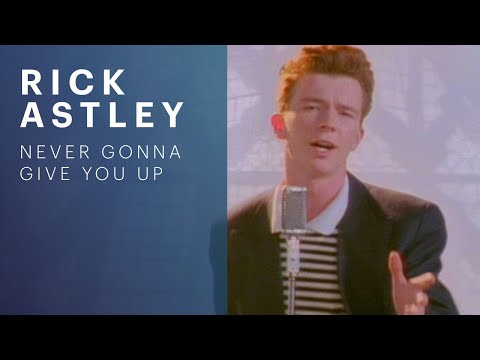

Button(description='Click Me!', style=ButtonStyle())

Text(value='', placeholder='Enter your name')

Button(description='Greet', style=ButtonStyle())

Output()

In [ ]:
from IPython.display import display
from PIL import Image
from IPython.display import display, HTML
from IPython.display import display, Markdown
from IPython.display import display, YouTubeVideo
import ipywidgets as widgets

import pandas as pd


# 이미지 출력 - Shell을 삭제하면 삭제됨
#image_path = "a.png"
#image = Image.open(image_path)
#display(image)

# html 출력
html_content = "<h1>Hello, World!</h1><br><img src = 'https://vintageappmaker.github.io/images/logo.png'>"
display(HTML(html_content))


# 표 출력
data = {'Name': ['John', 'Jane', 'Mike'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)
display(df)


# markdown 출력
link = '[OpenAI](https://openai.com)'
display(Markdown(link))


# 동영상 출력
video_id = 'dQw4w9WgXcQ'  # YouTube video ID
video = YouTubeVideo(video_id)
display(video)


# 위젯 출력 활용
def on_button_clicked(b):
    print("Button clicked!")

button = widgets.Button(description="Click Me!")
button.on_click(on_button_clicked)
display(button)

# 위젯활용 II
text = widgets.Text(placeholder='Enter your name')
button = widgets.Button(description='Greet')
output = widgets.Output()

def greet_user(b):
    with output:
        output.clear_output()
        print(f'Hello, {text.value}!')

button.on_click(greet_user)

display(text, button, output)